# Advanced Statistical Inference -- Bayesian inference for a coin tossing experiment


The beta probability density function is defined as:

$$
p(r \vert \alpha, \beta) = \dfrac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}r^{\alpha-1}(1-r)^{\beta-1} 
$$

where $0 \le r \le 1$ and $\alpha, \beta> 0$.
You can use the `plot_beta()` function.


In [19]:
from scipy.stats import beta
from scipy.special import gamma as gamma_func
from scipy.special import comb
from matplotlib import pyplot as plt
import numpy as np


In [20]:
def plot_beta(a,b, plot=False):
    plt.figure(figsize=(15,5))
    x = np.linspace(0, 1, 1000)
    plt.plot(x, beta.pdf(x, a, b),'r')
    plt.title("beta pdf: alpha=" + str(a) + " beta=" + str(b))
    plt.show()

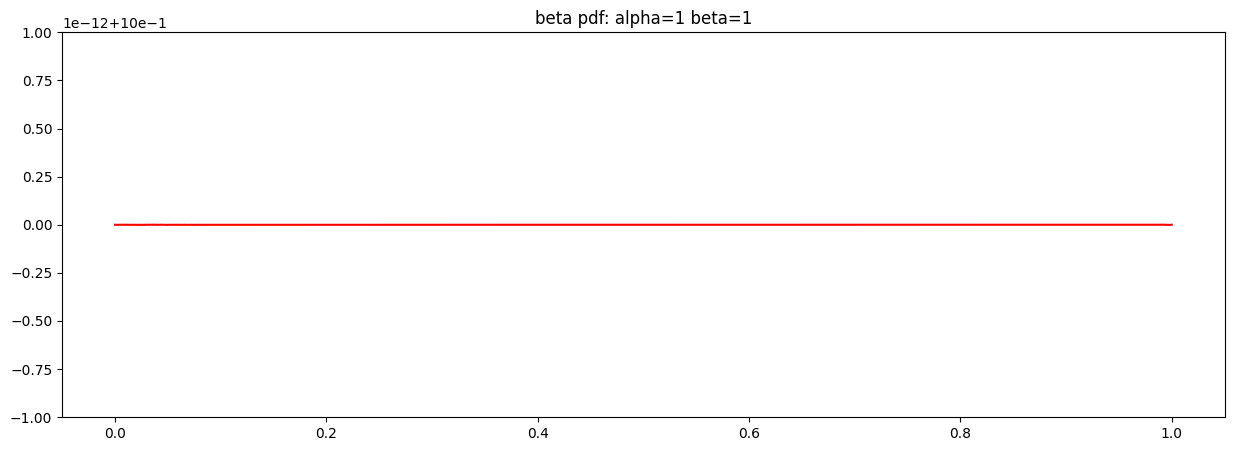

In [21]:
plot_beta(a=1, b=1)

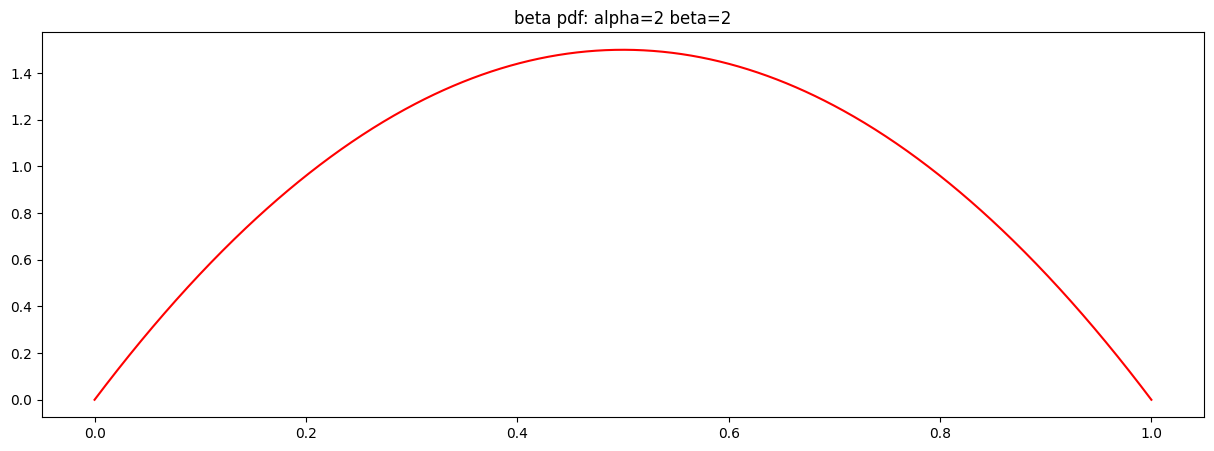

In [22]:
plot_beta(a=2, b=2)

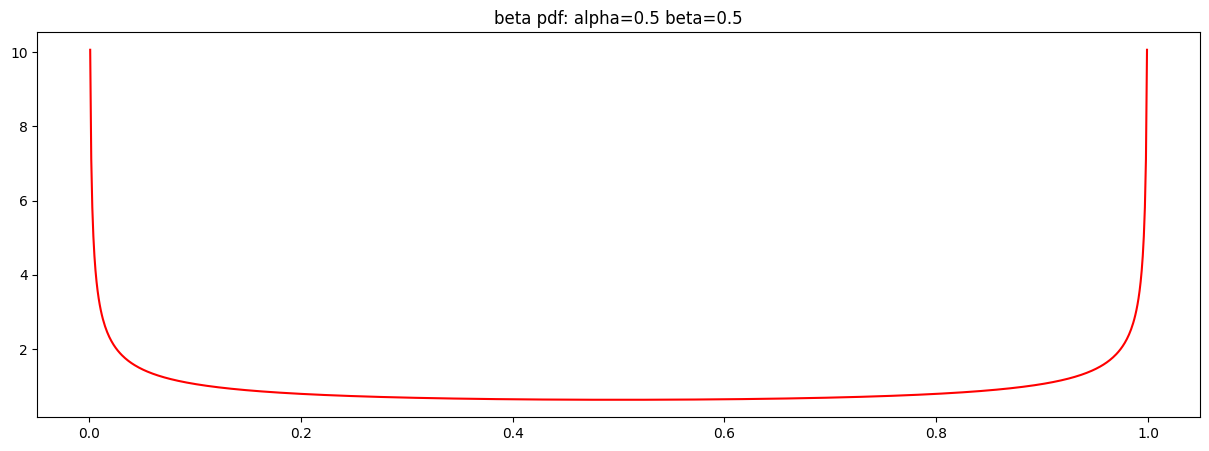

In [23]:
plot_beta(a=0.5, b=0.5)

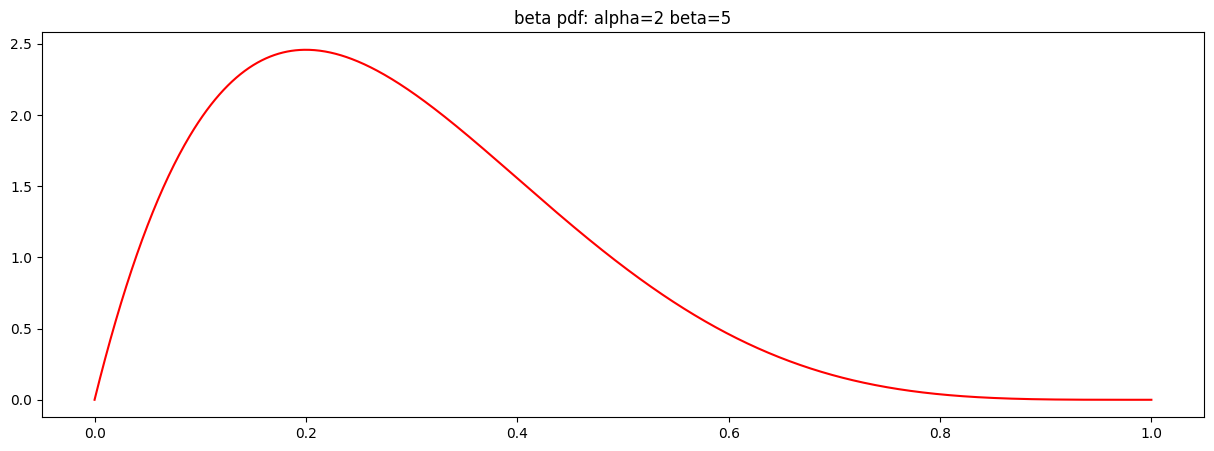

In [24]:
plot_beta(2, 5)

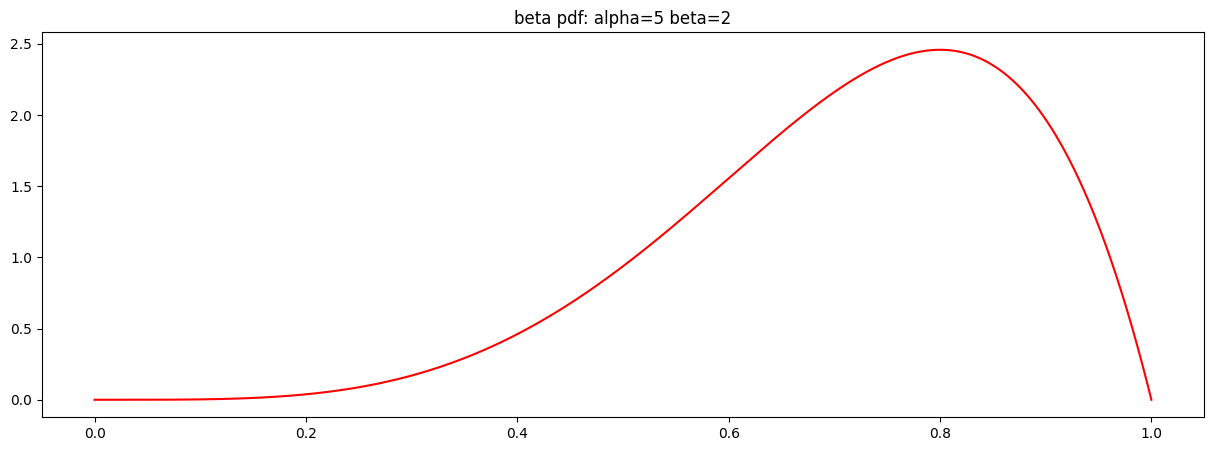

In [25]:
plot_beta(5,2)

**Exercise:**
$r$ is the probability of some hypothetical coin landing heads. The beta distribution is a suitable prior distribution for $r$. Choose 2 different pairs of values $\alpha$ and $\beta$ and plot the corresponding densities. For both cases, describe the possible beliefs they encode about the coin. Note, there is no ‘right’ answer here, just think about how likely different values of $r$ are in your densities and how this reflects on the coin.


Observe how the distribution changes for different values of 'a' and 'b', and comment on your results.


α > β: The graph would skew towards 1, indicating a belief that the coin is biased towards landing heads.

α < β: The graph would skew towards 0, indicating a belief that the coin is biased towards landing tails.

α = β > 1: The graph would be symmetrical with a peak at 0.5, but more "peaked" (indicating stronger belief in the fairness of the coin) compared to the α = β = 2 case.

α = β < 1: The graph would be symmetrical with a trough at 0.5 and higher values at the extremes, indicating a belief that the coin is likely to be biased (either towards heads or tails) rather than fair.

The Beta Distribution with α = β = 2: This is a symmetrical distribution centered around 0.5. The peak at 0.5 indicates that the belief about the coin being fair is the most credible. Values away from 0.5, towards 0 or 1, are considered less likely, representing less belief in the coin being biased towards tails or heads, respectively.

The Beta Distribution with α = β = 1: This is a uniform distribution across all values from 0 to 1, meaning that all outcomes for r are equally likely. In the context of a coin toss, this implies complete uncertainty about the coin's bias; there's no prior belief influencing the expected outcome of heads or tails, indicating a lack of any prior information about the coin's fairness.

**Exercise:**
`coin1()` and `coin2()` are two ‘coins’ that you can use. In either case, calling the function with an argument N tosses the coin N times and returns the number of heads. Pick either one and using the equations we derived in the class, along with any choice for $\alpha$ and $\beta$, plot the posterior density for $r$ after $N = 1, 5, 10, 100$ tosses. Use `plot_beta()` to do the plotting. You can put them all on one plot or all on separate plots. Explain what you see.


In [26]:
def coin1(N):
    return sum(np.random.random(N)<=0.3)
def coin2(N):
    return sum(np.random.random(N)<=0.8)

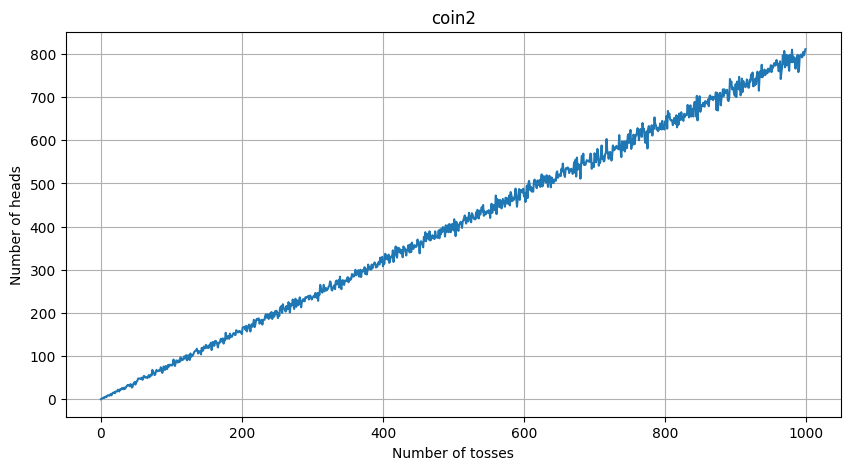

In [27]:
yN = [coin2(N) for N in range(1000)]
plt.figure(figsize=(10,5))
plt.plot(list(range(1000)), yN)
plt.xlabel("Number of tosses")
plt.ylabel("Number of heads")
plt.title("coin2")
plt.grid()
plt.show()

So, `coin2()` is biased to generate more heads (roughly 8 out of 10).

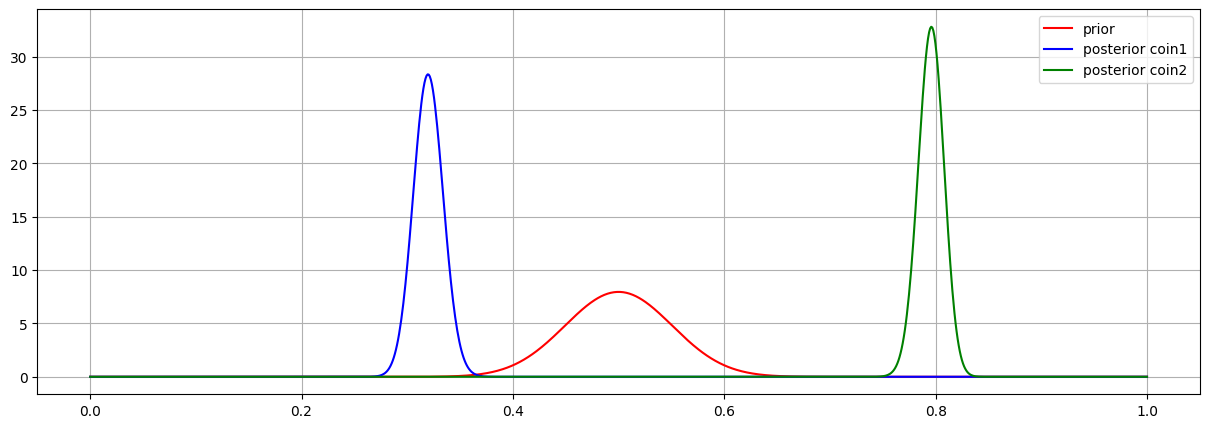

In [28]:
N = 1000

yN1, yN2 = coin1(N), coin2(N)

# Assume coins are fair

alpha1 = 50
beta1 = 50

# Compute the posterior 'gamma' and 'delta' parameters
gamma1, gamma2 = yN1 + alpha1, yN2 + alpha1 # TO COMPLETE
delta1, delta2 = beta1 + N - yN1, beta1 + N - yN2 # TO COMPLETE

plt.figure(figsize=(15,5))
x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, alpha1, beta1),'r', label='prior')
plt.plot(x, beta.pdf(x, gamma1, delta1),'b', label='posterior coin1')
plt.plot(x, beta.pdf(x, gamma2, delta2),'g', label='posterior coin2')
plt.legend()
plt.grid()
plt.show()

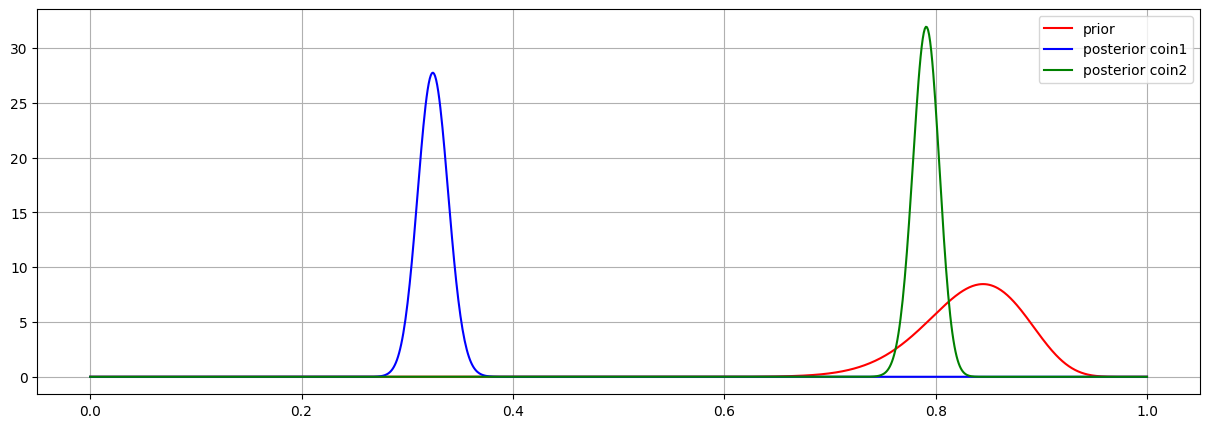

In [29]:
N = 1000

yN1, yN2 = coin1(N), coin2(N)

# Assume coins are biased

alpha1 = 50
beta1 = 10

# Compute the posterior 'gamma' and 'delta' parameters


### TO COMPLETE
gamma1, gamma2 = yN1 + alpha1, yN2 + alpha1 # TO COMPLETE
delta1, delta2 = beta1 + N - yN1, beta1 + N - yN2 # TO COMPLETE

plt.figure(figsize=(15,5))
x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, alpha1, beta1),'r', label='prior')
plt.plot(x, beta.pdf(x, gamma1, delta1),'b', label='posterior coin1')
plt.plot(x, beta.pdf(x, gamma2, delta2),'g', label='posterior coin2')
plt.legend()
plt.grid()
plt.show()

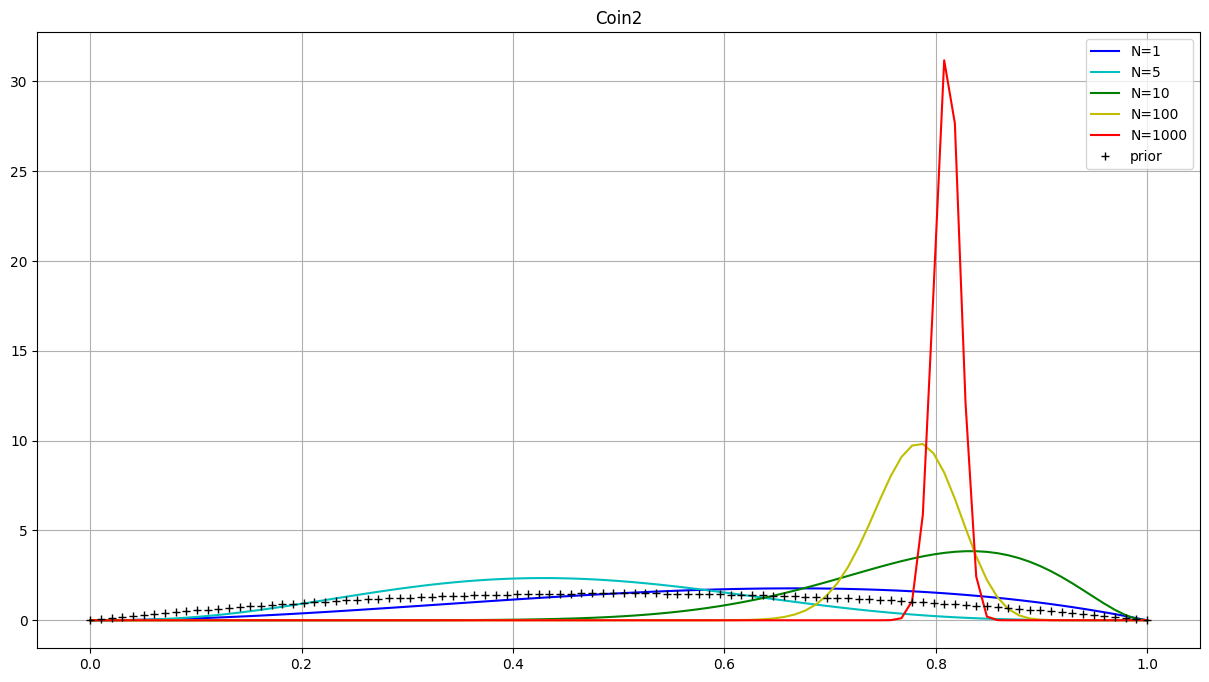

In [30]:
N = [1, 5, 10, 100, 1000]
cs = ['b', 'c', 'g', 'y', 'r']
a = 2
b = 2
x = np.linspace(0, 1, 100)
plt.figure(figsize=(15,8))
for i,n in enumerate(N):
    # Compute the posterior distribution for coin2 given 'n' tosses 
    yN1 = coin2(n) # TO COMPLETE 
    gamma = a+yN1 # TO COMPLETE
    delta = b+n-yN1 # TO COMPLETE
    plt.plot(x, beta.pdf(x,gamma,delta),color=cs[i], label="N="+str(n)) # TO COMPLETE
    
plt.plot(x, beta.pdf(x,a,b),'k+', label='prior') # TO COMPLETE
plt.title("Coin2")
plt.legend()
plt.grid()
plt.show()

Starting with α=2 and β=2, our prior distribution is symmetric around 0.5, indicating no initial bias. With only one toss (N=1), the posterior distribution is broad, reflecting significant uncertainty. As N increases, the posterior narrows, concentrating around 0.8, in line with the coin's bias. By N=1000, the posterior is sharply peaked at 0.8, signifying a high degree of confidence in the coin's likelihood of landing heads.

**Exercise:**
Repeat the previous exercise with a different set of prior parameter values ($\alpha$ and $\beta$). What
do you notice?


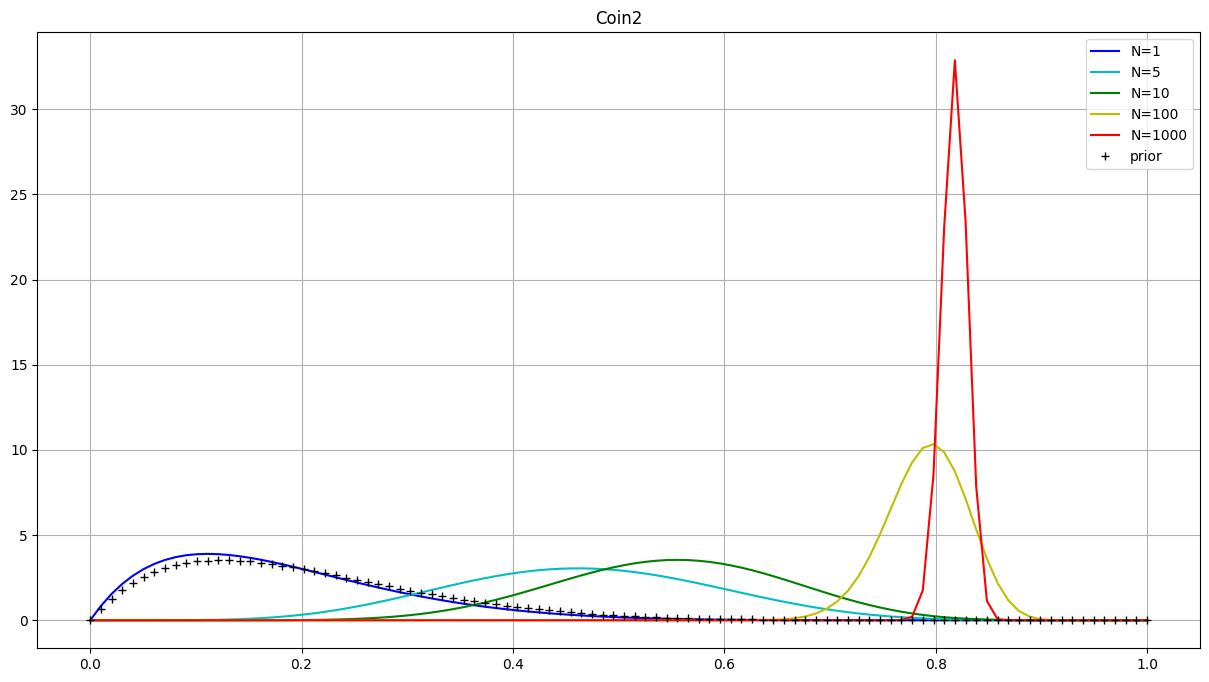

In [31]:
N = [1, 5, 10, 100, 1000]
cs = ['b', 'c', 'g', 'y', 'r']
a = 2
b = 8
x = np.linspace(0, 1, 100)
plt.figure(figsize=(15,8))
for i,n in enumerate(N):
    # Compute the posterior distribution for coin2 given 'n' tosses 
    yN1 = coin2(n) # TO COMPLETE 
    gamma = a+yN1 # TO COMPLETE
    delta = b+n-yN1 # TO COMPLETE
    plt.plot(x, beta.pdf(x,gamma,delta),color=cs[i], label="N="+str(n)) # TO COMPLETE
    
plt.plot(x, beta.pdf(x,a,b),'k+', label='prior') # TO COMPLETE
plt.title("Coin2")
plt.legend()
plt.grid()
plt.show()

the prior changed to α=2 and β=8, which shifts the center of the prior distribution towards a lower probability of heads, reflecting an initial belief that the coin is more likely to land tails. With this new prior, even after observing data from tosses, the posterior distributions are still influenced by the initial skepticism about the coin landing heads.

As N increases, the posteriors start adjusting towards the coin’s bias observed in the data, which seems to suggest a higher likelihood of heads (around 0.8). The convergence towards 0.8 is apparent, but due to the initial heavy-tailed prior, it takes more evidence (i.e., more tosses) to overcome the initial belief and for the posteriors to peak near 0.8.

By N=1000, the amount of data is sufficient to override the prior's influence, leading to a posterior that is sharply peaked at 0.8, similarly to the first exercise. This illustrates how a strong prior belief can be overcome by sufficient data, but it also shows that strong priors require more evidence to shift the posterior belief significantly.

## Making predictions

`fairground()` is a coin game – you pay £1 to play. The stall owner tosses a coin ten times. If there are 6 or fewer heads, you win £2. The function returns 1 if you win and 0 if you lose.

**Exercise:** The probability that you win could be approximated by playing the game lots of times and computing the proportion of times you do win! By embedding fairground.m in a loop, approximate the probability that you will win in this way.


In [32]:
def fairground():
    return sum(np.random.random(10)<0.8) <= 6 # coin2

In [33]:
print("Approx Winning Probability:", sum([fairground() for i in range(10000)])/10000)

Approx Winning Probability: 0.1228



**Exercise:**  In the lectures, we derived an expression for the probability of getting $y_{new}$ heads in N tosses having observed $y_N$ heads in N tosses by taking an expectation with respect to the posterior.
Choose $\alpha$ and $\beta$ as you please (as long as you can justify your choice – do you know anything about this coin?). Use `coin2()` to generate $y_N$ for $N = 10$. Compute the posterior parameters. By using them, the expression from the lectures and the following identity, compute the probability that you will win given the coin tosses you have observed (i.e., you just need to add together a series of the expressions you derived in the lecture). 

Note that this quantity depends on the prior and the particular $y_N$ you get from `coin2()` and therefore could be quite different from the quantity computed in the previous question.
$$
P(y_{new}\le 6 \vert y_N, \alpha, \beta) = \sum_{a=0}^{6} P(y_{new}=a \vert y_N, \alpha, \beta)
$$


In [34]:
from scipy.stats import beta, binom
import math
from scipy.special import gamma


Nlook = 50 
yN = coin2(Nlook)


# Assume the coin is unbiased
alpha1 = 50
beta1 = 50 
gamma1 = alpha1 + yN 
delta1 = beta1 + Nlook - yN 

N = 10
p_ynew_se_six = 0 

for ynew in range(7):
    binomial_coefficient = math.comb(N, ynew)
    p_ynew = binomial_coefficient * (gamma(gamma1 + delta1) / (gamma(gamma1) * gamma(delta1))) * (gamma(gamma1 + ynew) * gamma(delta1 + N - ynew) / gamma(gamma1 + delta1 + N))
    p_ynew_se_six += p_ynew


print(p_ynew_se_six)

0.6290941769792239


In [37]:
Nlook = 50 
yN = coin2(Nlook)

# Assume the coin is biased
alpha1 = 2 
beta1 = 8
gamma1 = alpha1 + np.sum(yN) 
delta1 = beta1 + Nlook - np.sum(yN) 

N = 10
p_ynew_se_six = 0 

for ynew in range(7):
    binomial_coefficient = math.comb(N, ynew)
    p_ynew = binomial_coefficient * (gamma(gamma1 + delta1) / (gamma(gamma1) * gamma(delta1))) * (gamma(gamma1 + ynew) * gamma(delta1 + N - ynew) / gamma(gamma1 + delta1 + N))
    p_ynew_se_six += p_ynew

print(p_ynew_se_six)

0.3561499490161304


In [36]:
from math import lgamma

Nlook = 10000
yN = coin2(Nlook)

# Assume the coin is unbiased
alpha1 = 50
beta1 = 50 

gamma1 = alpha1 + yN 
delta1 = beta1 + Nlook - yN 

N = 10
p_ynew_se_six = 0 # smaller or equal to 6

for ynew in range(7):
    # Compute probability using formula given in slides
    binomial_coefficient = math.comb(N, ynew)
    log_p_ynew = (lgamma(gamma1 + delta1) - lgamma(gamma1) - lgamma(delta1) + lgamma(gamma1 + ynew) + lgamma(delta1 + N - ynew) - lgamma(gamma1 + delta1 + N))
    p_ynew = binomial_coefficient * math.exp(log_p_ynew)
    p_ynew_se_six += p_ynew

print(p_ynew_se_six)

0.1313106073993697


The probability of observing six or fewer heads in future tosses averages around 60% after conducting N=50 trials, assuming we start with an unbiased coin (α=50, β=50). This is based on a Beta distribution prior belief, where α and β represent the number of successes (heads) and failures (tails) respectively.

However, if we start with a prior belief that the coin is biased (α=2, β=8), the estimated probability decreases to approximately 30%. This is because the Beta distribution is skewed towards tails, reflecting our belief that the coin is biased.

When we increase the number of trials to a large number, say N=10000, the posterior distribution becomes more concentrated and the estimated probability drops to around 13%. This is due to the law of large numbers, which states that as the number of trials increases, the sample average (and hence the estimated probability) converges to the true average.

However, when dealing with large values of N, we may encounter numerical issues due to the computation of the Gamma function in the Beta distribution. The Gamma function can produce very large values for relatively small inputs, leading to numerical overflow for larger inputs.

To mitigate this, we can use the logarithm of the Gamma function, known as the log-Gamma function. This allows us to perform computations in the log space, where the numbers are more manageable, and then exponentiate the result to get the final probability. This approach can help prevent numerical overflow and improve the accuracy of the calculations when dealing with large values of N.